# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (PCA).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

Пусть на вход подаются центрированные данные:

$$
x_i = \begin{pmatrix}
x_{i1} \\
x_{i2} \\
\vdots \\
x_{ip}
\end{pmatrix} \in \mathbb{R}^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum_{i=1}^n x_i = 0.
$$

Где:
- $X$ — матрица размера $n \times p$, где каждая строка представляет собой объект-признак (т.е. объекты расположены по строкам).
- $W$ — матрица размера $p \times l$ из ортонормированных базисных векторов линейного подпространства $\mathbb{R}^l$, в которое мы хотим "вложить" исходные объекты.
- $Z$ — матрица размера $n \times l$ — матрица координат новых объектов в новом базисе.

Функция потерь ($l_2$-потери) определяется как:

$$
L(W) = \|X^T - WZ^T\|_F^2 = \sum_{i=1}^n \|x_i - Wz_i\|^2.
$$

## Задание 1

Для построения первых двух главных компонент мы рассматриваем $l = 2$, то есть $W$ будет матрицей размера $p \times 2$, содержащей два ортонормированных вектора $w_1$ и $w_2$. Аналогично, $Z$ будет матрицей размера $n \times 2$, содержащей новые координаты $z_{i1}$ и $z_{i2}$ для каждого объекта $i$.

Функция потерь для двух компонент записывается как:

$$
L(W, Z) = \sum_{i=1}^n \|x_i - w_1 z_{i1} - w_2 z_{i2}\|^2.
$$

**Условия:**
1. Ортонормированность базисных векторов:
   $$
   w_1^T w_1 = 1, \quad w_2^T w_2 = 1, \quad w_1^T w_2 = 0.
   $$
2. Центрированность данных:
   $$
   \sum_{i=1}^n x_i = 0.
   $$

Таким образом, задача сводится к минимизации квадрата Фробениусовой нормы:

$$
L(W, Z) = \|X - Z W^T\|_F^2.
$$

## Задание 2

Для минимизации функции потерь $L(W, Z) = \|X - Z W^T\|_F^2$ необходимо найти оптимальные значения $Z$ при фиксированном $W$. Рассмотрим задачу минимизации для фиксированного $W$.

$$
L(W, Z) = \sum_{i=1}^n \|x_i - w_1 z_{i1} - w_2 z_{i2}\|^2.
$$

Для каждого объекта $i$ найдем производные функции потерь по $z_{i1}$ и $z_{i2}$ и приравняем их к нулю.

**Частная производная по $z_{i1}$:**

$$
\frac{\partial L}{\partial z_{i1}} = -2 w_1^T (x_i - w_1 z_{i1} - w_2 z_{i2}) = 0.
$$

**Частная производная по $z_{i2}$:**

$$
\frac{\partial L}{\partial z_{i2}} = -2 w_2^T (x_i - w_1 z_{i1} - w_2 z_{i2}) = 0.
$$

Получаем систему:

$$
\begin{cases}
w_1^T x_i = w_1^T w_1 z_{i1} + w_1^T w_2 z_{i2}, \\
w_2^T x_i = w_2^T w_1 z_{i1} + w_2^T w_2 z_{i2}.
\end{cases}
$$

Используя условие ортонормированности $w_1^T w_2 = 0$ и $w_j^T w_j = 1$, система упрощается до:

$$
\begin{cases}
z_{i1} = w_1^T x_i, \\
z_{i2} = w_2^T x_i.
\end{cases}
$$

Таким образом, новые координаты $z_{i1}$ и $z_{i2}$ получаются как скалярные произведения исходных данных $x_i$ на соответствующие векторы $w_1$ и $w_2$:

$$
z_{i1} = x_i^T w_1, \quad z_{i2} = x_i^T w_2.
$$

Это означает, что новые координаты являются проекциями исходных данных на соответствующие векторы главных компонент.

## Задание 3

Для центрированных данных выборочная ковариационная матрица $\Sigma$ определяется как:

$$
\Sigma = \frac{1}{n} X^T X.
$$

Функция потерь:

$$
L(W, Z) = \|X - Z W^T\|_F^2 = \sum_{i=1}^n \|x_i - w_1 z_{i1} - w_2 z_{i2}\|^2.
$$

Подставим найденные ранее выражения для $z_{i1}$ и $z_{i2}$:

$$
Z = X W,
$$

где $W = \begin{pmatrix} w_1 & w_2 \end{pmatrix} \in \mathbb{R}^{p \times 2}$.

Тогда функция потерь принимает вид:

$$
L(W) = \|X - X W W^T\|_F^2.
$$

Мы хотим минимизировать $L(W) = \|X - X W W^T\|_F^2$ при условии, что столбцы $W$ ортонормированы ($W^T W = I$).

Раскроем квадрат Фробениусовой нормы:

$$
L(W) = \text{Trace}\left( (X - X W W^T)^T (X - X W W^T) \right).
$$

Раскрывая произведение, получаем:

$$
L(W) = \text{Trace}(X^T X) - 2 \text{Trace}(W^T X^T X W) + \text{Trace}(W^T X^T X W W^T W).
$$

Учитывая ортонормированность $W^T W = I$ и свойства следа (Trace), последнее слагаемое упрощается:

$$
\text{Trace}(W^T X^T X W W^T W) = \text{Trace}(W^T X^T X W).
$$

Таким образом, функция потерь упрощается до:

$$
L(W) = \text{Trace}(X^T X) - \text{Trace}(W^T X^T X W).
$$

Минимизируя $L(W)$, мы эквивалентно максимизируем следовое выражение:

$$
\text{Trace}(W^T \Sigma W) = \text{Trace}(W^T \frac{1}{n} X^T X W).
$$

Задача сводится к максимизации:

$$
\text{Trace}(W^T \Sigma W)
$$

при условии $W^T W = I$. Это стандартная задача нахождения собственных векторов матрицы $\Sigma$, соответствующих наибольшим собственным значениям.

Метод максимизации следового выражения приводит к тому, что столбцы матрицы $W$ должны совпадать с собственными векторами матрицы $\Sigma$, соответствующими наибольшим собственным значениям.

Таким образом:
- Вектор $w_1$ соответствует первому собственному вектору матрицы $\Sigma$, отвечающему наибольшему собственному значению $\lambda_1$.
- Вектор $w_2$ соответствует второму собственному вектору матрицы $\Sigma$, отвечающему второму по величине собственному значению $\lambda_2$.

Собственные векторы симметричной матрицы $\Sigma$ ортогональны друг другу. Это означает, что:

$$
w_j^T w_k = 0, \quad \forall j \neq k.
$$

Таким образом, $w_1$ и $w_2$ ортогональны и образуют ортонормированный базис для нового подпространства $\mathbb{R}^2$.

## Задание 4

Как показано в Задании 2, новые координаты получаются путем проекции исходных данных на соответствующие собственные векторы:

$$
z_{i1} = x_i^T w_1, \quad z_{i2} = x_i^T w_2.
$$

Дисперсия новой координаты $z_{j}$ определяется как:

$$
\text{Var}(z_j) = \frac{1}{n} \sum_{i=1}^n z_{ij}^2 = \frac{1}{n} \sum_{i=1}^n (x_i^T w_j)^2.
$$

Пусть $W$ — матрица, содержащая столбцы $w_1$ и $w_2$. Тогда матрица координат $Z = X W$.

Матрица ковариации для новых координат $\Sigma_Z$ определяется как:

$$
\Sigma_Z = \frac{1}{n} Z^T Z = \frac{1}{n} W^T X^T X W = W^T \Sigma W.
$$

Поскольку $w_1$ и $w_2$ являются собственными векторами матрицы $\Sigma$, соответствующими собственным значениям $\lambda_1$ и $\lambda_2$, имеем:

$$
\Sigma w_j = \lambda_j w_j, \quad j = 1, 2.
$$

Тогда:

$$
\Sigma_Z = W^T \Sigma W = \begin{pmatrix}
w_1^T \Sigma w_1 & w_1^T \Sigma w_2 \\
w_2^T \Sigma w_1 & w_2^T \Sigma w_2
\end{pmatrix}.
$$

Используя ортогональность собственных векторов ($w_j^T w_k = 0$ для $j \neq k$) и свойства симметричной матрицы $\Sigma$, получаем:

$$
\Sigma_Z = \begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix}.
$$

Полученная диагональная матрица $\Sigma_Z$ показывает, что дисперсия данных вдоль первой главной компоненты равна $\lambda_1$, а вдоль второй — $\lambda_2$. Таким образом:

$$
\text{Var}(z_1) = \lambda_1, \quad \text{Var}(z_2) = \lambda_2.
$$

Собственные значения $\lambda_1$ и $\lambda_2$ ковариационной матрицы $\Sigma$ представляют собой выборочные дисперсии новых координат $z_{i1}$ и $z_{i2}$ соответственно. Это означает, что:
- **$\lambda_1$** — дисперсия данных вдоль первой главной компоненты (направления $w_1$).
- **$\lambda_2$** — дисперсия данных вдоль второй главной компоненты (направления $w_2$).

Эти значения количественно оценивают, насколько сильно варьируются данные вдоль соответствующих направлений в новом пространстве, что является основным статистическим смыслом собственных чисел в контексте PCA.


## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог PCA.

5. Показать численно (на конкретной матрице) с использованием, например, numpy.

1.

Матрица $XX^T$ является симметричной и положительно полуопределённой матрицей размерности $n \times n$. Согласно теореме о разложении симметричной матрицы, существует ортогональная матрица $U$, такая что:

$$
U^T XX^T U = \Lambda
$$

где $\Lambda$ — диагональная матрица, содержащая собственные значения матрицы $XX^T$.

2.

Имеем:

$$
XX^T U = U \Lambda
$$

Умножаем обе части слева на $X^T$:

$$
X^T XX^T U = X^T U \Lambda
$$

С другой стороны, $X^TX$ — симметричная матрица размерности $p \times p$. Поскольку $U$ — ортогональная матрица размерности $n \times n$, $X^TU$ имеет размерность $p \times n$.

Таким образом:

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

Что означает, что столбцы матрицы $X^TU$ являются собственными векторами матрицы $X^TX$, соответствующими собственным значениям из диагонали матрицы $\Lambda$.

3.

Пусть $V = X^TU$. Тогда:

$$
V^T V = U^T X X^T U = \Lambda
$$

Поскольку $\Lambda$ — диагональная матрица, матрица $V^T V$ является диагональной. Это означает, что столбцы матрицы $V$ ортогональны друг другу. Однако, их нормы равны корням из собственных значений $\Lambda$, и, следовательно, если собственные значения не равны 1, столбцы матрицы $V$ не ортонормированы.

4.

Для ортонормирования столбцов матрицы $V = X^TU$, необходимо поделить каждый столбец на его норму:

$$
W = V D^{-1/2}
$$

где $D$ — диагональная матрица, содержащая собственные значения $\Lambda$, а $D^{-1/2}$ — диагональная матрица с элементами $\frac{1}{\sqrt{\lambda_i}}$.

Таким образом, матрица $W$ будет иметь ортонормированные столбцы:

$$
W^T W = D^{-1/2} V^T V D^{-1/2} = D^{-1/2} \Lambda D^{-1/2} = I
$$

Теперь, проекции данных на новые компоненты будут вычисляться как:

$$
Z = XW
$$

Это соответствует стандартному алгоритму PCA, где матрица направляющих векторов $W$ содержит собственные векторы ковариационной матрицы $X^TX$, ортонормированные друг относительно друга.

In [ ]:
import numpy as np

# Пример матрицы X (центрированные данные)
X = np.array([
    [2, 0, 1],
    [0, 1, -1],
    [1, -1, 1]
], dtype=float)

# Проверим, что среднее по строкам равно нулю
print("Среднее по строкам:", X.mean(axis=0))

# Вычисляем матрицу X X^T
XXT = np.dot(X, X.T)
print("Матрица X X^T:\n", XXT)

# Находим собственные значения и собственные векторы матрицы X X^T
eigvals, eigvecs = np.linalg.eigh(XXT)

# Сортируем собственные значения и векторы по убыванию
sorted_indices = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[sorted_indices]
eigvecs_sorted = eigvecs[:, sorted_indices]

print("Собственные значения (от большего к меньшему):", eigvals_sorted)
print("Собственные векторы:\n", eigvecs_sorted)

# Матрица U
U = eigvecs_sorted
print("Ортогональная матрица U:\n", U)

# Проверяем, что U^T XXT U = Lambda
Lambda = np.diag(eigvals_sorted)
UT_XXTU = np.dot(U.T, np.dot(XXT, U))
print("U^T XXT U:\n", UT_XXTU)
print("Lambda:\n", Lambda)

# Проверяем, что U^T XXT U = Lambda
print("Проверка равенства U^T XXT U == Lambda:", np.allclose(UT_XXTU, Lambda))

# Находим матрицу X^T U
XTU = np.dot(X.T, U)
print("Матрица X^T U:\n", XTU)

# Проверяем ортогональность столбцов X^T U
print("X^T U * X^T U =\n", np.dot(XTU.T, XTU))

# Ортонормирование столбцов
D = np.diag(eigvals_sorted)
D_inv_sqrt = np.diag(1.0 / np.sqrt(eigvals_sorted))
W = np.dot(XTU, D_inv_sqrt)
print("Ортонормированная матрица W:\n", W)

# Проверяем, что W^T W = I
print("W^T W =\n", np.dot(W.T, W))

Среднее по строкам: [1.         0.         0.33333333]
Матрица X X^T:
 [[ 5. -1.  3.]
 [-1.  2. -2.]
 [ 3. -2.  3.]]
Собственные значения (от большего к меньшему): [7.85085508 2.088146   0.06099892]
Собственные векторы:
 [[-0.73697623  0.59100905 -0.32798528]
 [ 0.32798528  0.73697623  0.59100905]
 [-0.59100905 -0.32798528  0.73697623]]
Ортогональная матрица U:
 [[-0.73697623  0.59100905 -0.32798528]
 [ 0.32798528  0.73697623  0.59100905]
 [-0.59100905 -0.32798528  0.73697623]]
U^T XXT U:
 [[ 7.85085508e+00  5.25270126e-16 -1.18895920e-15]
 [ 7.92522384e-16  2.08814600e+00 -5.51094791e-16]
 [-1.06540829e-15 -6.60153906e-16  6.09989247e-02]]
Lambda:
 [[7.85085508 0.         0.        ]
 [0.         2.088146   0.        ]
 [0.         0.         0.06099892]]
Проверка равенства U^T XXT U == Lambda: True
Матрица X^T U:
 [[-2.06496151  0.85403282  0.08100567]
 [ 0.91899433  1.06496151 -0.14596718]
 [-1.65597056 -0.47395246 -0.1820181 ]]
X^T U * X^T U =
 [[ 7.85085508e+00  7.39717325e-16 -1.

## Практическая часть

Рассмотрим применение PCA в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с FashionMNIST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(-0.5, 419.5, 279.5, -0.5)

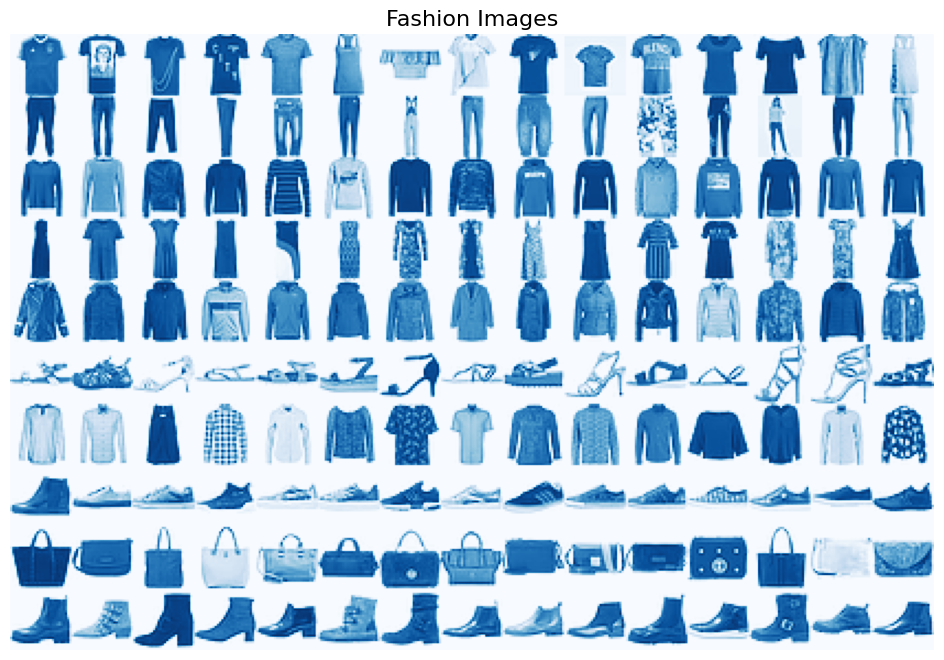

In [ ]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [ ]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи train_test_split разбейте набор данных на тренировочную и тестовую части в соотношении 80:20. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать random_state.

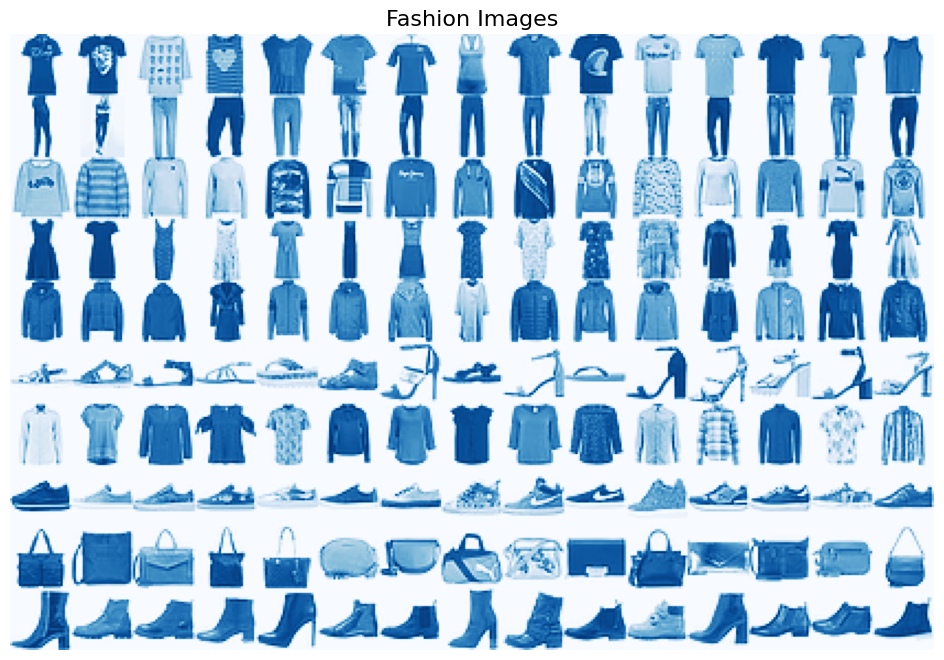

Тренировочная выборка: (8000, 784), (8000,)
Тестовая выборка: (2000, 784), (2000,)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes), w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')
plt.show()

# Подготовка данных
X = test_images.reshape(len(test_images), -1)
y = test_labels

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Тренировочная выборка: {X_train.shape}, {y_train.shape}")
print(f"Тестовая выборка: {X_test.shape}, {y_test.shape}")

Обучите модель LogisticRegression со следующими параметрами: max_iter=2000, tol=0.001 на тренировочных данных. При помощи f1_score с параметром average='weighted' оцените модель на тестовых данных.

In [ ]:
# Обучение модели Logistic Regression
clf = LogisticRegression(max_iter=2000, tol=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Оценка модели с использованием F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score на чистых тестовых данных: {f1:.4f}")

F1-score на чистых тестовых данных: 0.7451


**Вопрос:** как работает f1_score и что показывает данная метрика? Опишите её плюсы и минусы. Что означает параметр average='weighted'? Какие ещё бывают параметры, зачем и когда они используются?

**Ваш ответ:**

Метрика F1-score является гармоническим средним между точностью (precision) и полнотой (recall). Она вычисляется по формуле:

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Где:**
- **Precision (Точность):** отношение правильно предсказанных положительных результатов к общему количеству предсказанных положительных результатов.
  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$
  
- **Recall (Полнота):** отношение правильно предсказанных положительных результатов к общему количеству реальных положительных результатов.
  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

**Преимущества F1-score:**
- Учитывает как точность, так и полноту, что делает её более информативной метрикой в случаях несбалансированных классов.
- Подходит для задач, где важно сбалансировать ошибки первого и второго рода.

**Недостатки F1-score:**
- Не учитывает истинно отрицательные результаты (TN), что может быть важно в некоторых задачах.
- Не отражает абсолютное количество ошибок, только их соотношение.

**Параметр average='weighted':**
- При использовании многоклассовых задач, average='weighted' вычисляет среднее F1-score по всем классам, взвешенное по количеству образцов в каждом классе. Это позволяет учитывать дисбаланс классов, предотвращая смещение метрики в сторону более часто встречающихся классов.

**Другие параметры average:**
- 'macro': вычисляет среднее F1-score по всем классам, без учета количества образцов в каждом классе. Подходит, когда необходимо одинаково оценивать все классы.
- 'micro': вычисляет глобальные значения TP, FP и FN по всем классам и затем вычисляет F1-score. Подходит для задач, где важно общее количество правильно предсказанных образцов.
- 'binary': применяется для бинарной классификации, фокусируясь на положительном классе.

**Когда использовать:**
- 'weighted': когда классы несбалансированы и необходимо учитывать их относительную важность.
- 'macro': когда важно одинаково оценивать все классы, независимо от их частоты.
- 'micro': когда важно общее количество правильно предсказанных образцов.
- 'binary': для бинарных классификационных задач.


Добавьте к тестовым данным шум при помощи np.random.normal(X_test, scale), где scale $\in \{50,100,150,200\}$. Визуально оцените результаты.

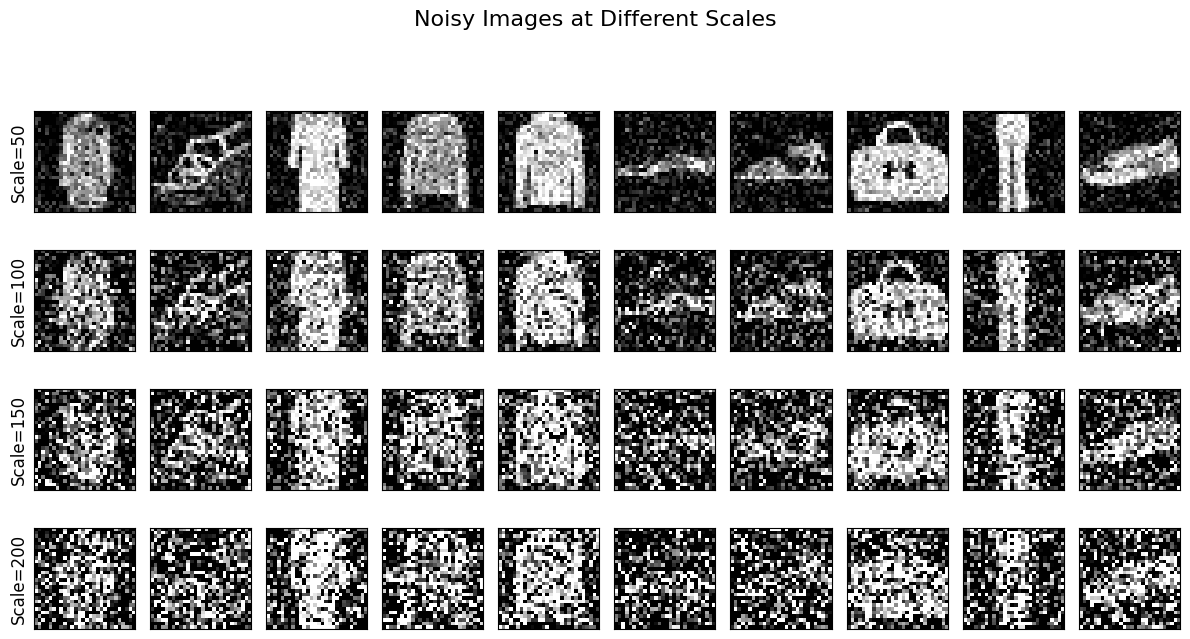

In [ ]:
scales = [50, 100, 150, 200]

X_test_noisy = {scale: add_noise(X_test, scale) for scale in scales}

fig, axes = plt.subplots(len(scales), 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Noisy Images at Different Scales', fontsize=16)

for row, scale in enumerate(scales):
    for col in range(10):
        axes[row, col].imshow(X_test_noisy[scale][col].reshape(28, 28), cmap='gray')
        if col == 0:
            axes[row, col].set_ylabel(f'Scale={scale}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Ваши выводы:**
Зашумленные изображения становятся менее четкими с увеличением значения параметра scale. Это добавление шума демонстрирует, как внешние искажения могут повлиять на изображения и усложнить задачу их классификации.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи f1_score с параметром average='weighted'.

In [ ]:
# Предсказания и оценка F1-score на зашумленных данных
f1_noisy = {}
for scale in scales:
    X_noisy = X_test_noisy[scale]
    y_pred_noisy = clf.predict(X_noisy)
    f1_noisy[scale] = f1_score(y_test, y_pred_noisy, average='weighted')
    print(f"F1-score на тестовых данных с шумом scale={scale}: {f1_noisy[scale]:.4f}")

F1-score на тестовых данных с шумом scale=50: 0.5155
F1-score на тестовых данных с шумом scale=100: 0.3325
F1-score на тестовых данных с шумом scale=150: 0.2325
F1-score на тестовых данных с шумом scale=200: 0.1719


**Ваши выводы:**
С увеличением масштаба шума значение метрики F1-score уменьшается, что подтверждает ухудшение качества классификации на зашумленных данных.

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель PCA(explained_variance) на зашумленных тестовых данных, где explained_variance $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи .inverse_transform() "восстановите" данные до приближенных исходных.

PCA восстановление с объяснённой дисперсией=0.1
PCA восстановление с объяснённой дисперсией=0.2
PCA восстановление с объяснённой дисперсией=0.3
PCA восстановление с объяснённой дисперсией=0.4
PCA восстановление с объяснённой дисперсией=0.5
PCA восстановление с объяснённой дисперсией=0.6
PCA восстановление с объяснённой дисперсией=0.7
PCA восстановление с объяснённой дисперсией=0.8
PCA восстановление с объяснённой дисперсией=0.9


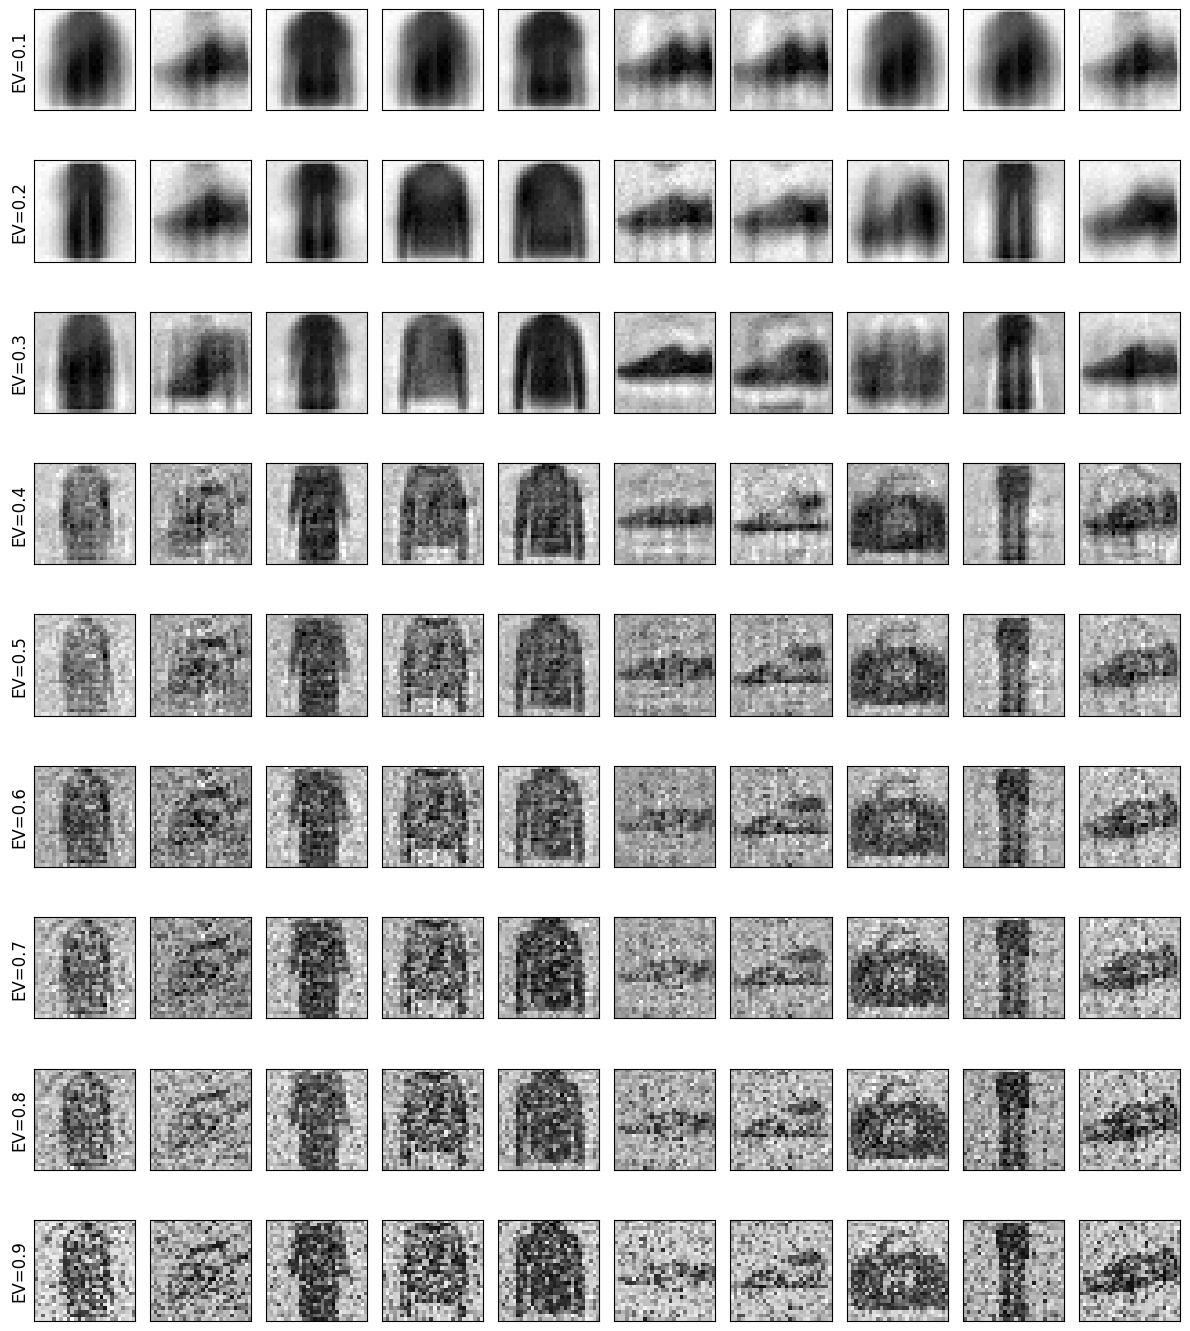

In [ ]:
# Функция для восстановления данных с помощью PCA
def restore_with_pca(X_noisy, explained_variance):
    pca = PCA(n_components=explained_variance, svd_solver='full')
    X_pca = pca.fit_transform(X_noisy)
    X_restored = pca.inverse_transform(X_pca)
    return X_restored

# Применение PCA с различными уровнями объяснённой дисперсии
explained_variances = np.arange(0.1, 1.0, 0.1)
restored_X_test_noisy = {}

for ev in explained_variances:
    restored_X_test_noisy[ev] = restore_with_pca(X_test_noisy[100], ev)  # Используем scale=100 для примера
    print(f"PCA восстановление с объяснённой дисперсией={ev:.1f}")

fig, axes = plt.subplots(len(explained_variances), 10, figsize=(12, 14), subplot_kw={'xticks': [], 'yticks': []})

for row, ev in enumerate(explained_variances):
    for col in range(10):
        ax = axes[row, col]
        ax.imshow(restored_X_test_noisy[ev][col].reshape(28, 28), cmap=plt.cm.gray_r)
        if col == 0:
            ax.set_ylabel(f'EV={ev:.1f}', fontsize=12)

plt.tight_layout()
plt.show()

**Ваши выводы:**

Применение PCA для восстановления зашумленных данных позволяет снизить влияние шума. С увеличением уровня объяснённой дисперсии (explained variance) качество восстановления улучшается, однако существует компромисс между удалением шума и сохранением деталей изображения.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи f1_score с параметром average='weighted'.

In [ ]:
# Предсказания и оценка F1-score на очищенных данных
f1_restored = {}
for ev in explained_variances:
    X_restored = restored_X_test_noisy[ev]
    y_pred_restored = clf.predict(X_restored)
    f1_restored[ev] = f1_score(y_test, y_pred_restored, average='weighted')
    print(f"F1-score на восстановленных данных с EV={ev:.1f}: {f1_restored[ev]:.4f}")

F1-score на восстановленных данных с EV=0.1: 0.0426
F1-score на восстановленных данных с EV=0.2: 0.1647
F1-score на восстановленных данных с EV=0.3: 0.3306
F1-score на восстановленных данных с EV=0.4: 0.4022
F1-score на восстановленных данных с EV=0.5: 0.3996
F1-score на восстановленных данных с EV=0.6: 0.3991
F1-score на восстановленных данных с EV=0.7: 0.3789
F1-score на восстановленных данных с EV=0.8: 0.3612
F1-score на восстановленных данных с EV=0.9: 0.3517


В качестве результата **НАГЛЯДНО** представьте получаемые значения f1_score в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

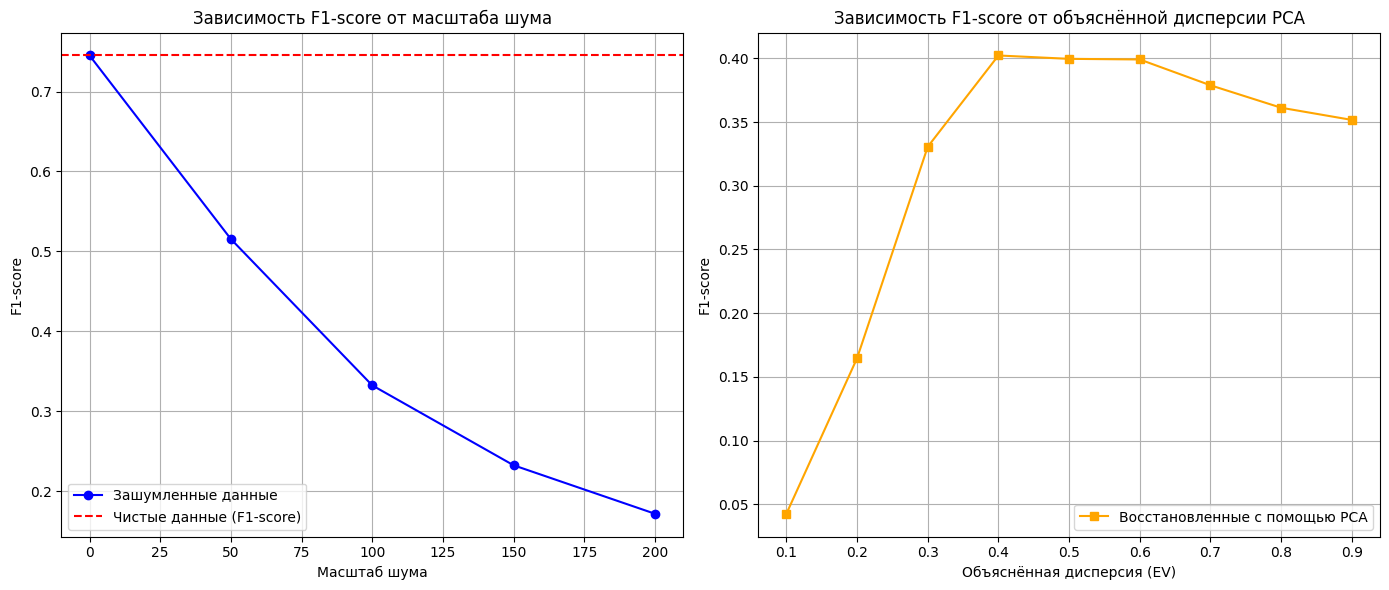

In [ ]:
import matplotlib.pyplot as plt

noise_scales = [0] + scales
explained_variances = list(f1_restored.keys())

# Добавляем F1-score для чистых данных
f1_noisy_values = [f1] + [f1_noisy[scale] for scale in scales]

# Получаем значения F1-score для каждого уровня объяснённой дисперсии PCA
f1_restored_values = [f1_restored[ev] for ev in explained_variances]

plt.figure(figsize=(14, 6))

# График F1-score в зависимости от уровня шума
plt.subplot(1, 2, 1)
plt.plot(noise_scales, f1_noisy_values, label='Зашумленные данные', marker='o', color='blue')
plt.axhline(y=f1, color='red', linestyle='--', label='Чистые данные (F1-score)')
plt.xlabel('Масштаб шума')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от масштаба шума')
plt.legend()
plt.grid(True)

# График F1-score в зависимости от доли объяснённой дисперсии
plt.subplot(1, 2, 2)
plt.plot(explained_variances, f1_restored_values, label='Восстановленные с помощью PCA', marker='s', color='orange')
plt.xlabel('Объяснённая дисперсия (EV)')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от объяснённой дисперсии PCA')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Ваши выводы:**

F1-score постепенно уменьшается по мере увеличения уровня шума, что ожидаемо, так как сильный шум делает данные более искаженными и усложняет задачу классификации.

На чистых данных (пунктирная красная линия) F1-score значительно выше, что подтверждает негативное влияние шума на качество модели.

По мере увеличения объяснённой дисперсии F1-score возрастает, что указывает на улучшение качества классификации при восстановлении структуры данных.

При высоких уровнях объяснённой дисперсии (около 0.4–0.6) F1-score стабилизируется, а затем начинает немного снижаться, что может свидетельствовать о том, что после определенного уровня добавление новых компонент не улучшает, а иногда даже немного ухудшает результат.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся t-SNE.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования SNE и t-SNE.

Расстояние Кульбака–Лейблера между двумя распределениями $P = \{p_1, p_2, \ldots, p_n\}$ и $Q = \{q_1, q_2, \ldots, q_n\}$ определяется как:

$$
\mathbb{KL}(P \| Q) = \sum_{i=1}^n p_i \log \left( \frac{p_i}{q_i} \right)
$$

### Определение вероятностей

Пусть:
- **Перплексия** равна $k$.
- $p_{i|j} = \frac{1}{k}$ для $k$ ближайших соседей точки $j$ за исключением самой точки $j$.
- $p_{j|j} = 0$ и $p_{i|j} = 0$ для всех остальных $i$ не являющихся $k$-ближайшими соседями точки $j$.

Тогда вероятность $p_{ij}$ определяется как:

$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}
$$

где $n$ — общее количество точек.

## Градиент для SNE

### Определение вероятностей $Q$ в SNE

В методе SNE вероятности $q_{ij}$ определяются следующим образом:

$$
q_{ij} = \frac{\exp(-\|y_i - y_j\|^2)}{\sum_{k \neq l} \exp(-\|y_k - y_l\|^2)}
$$

### Вычисление градиента $\frac{\partial \mathbb{KL}}{\partial y_i}$ для SNE

1. **Запись функции KL для SNE:**

   $$
   \mathbb{KL}(P \| Q) = \sum_{i=1}^n \sum_{j=1}^n p_{ij} \log \left( \frac{p_{ij}}{q_{ij}} \right)
   $$

2. **Переход к частным производным:**

   $$
   \frac{\partial \mathbb{KL}}{\partial y_i} = \sum_{j=1}^n \left( p_{ij} - q_{ij} \right) \frac{\partial}{\partial y_i} \log q_{ij}
   $$

3. **Вычисление производной $\frac{\partial}{\partial y_i} \log q_{ij}$:**

   $$
   \frac{\partial}{\partial y_i} \log q_{ij} = \frac{1}{q_{ij}} \frac{\partial q_{ij}}{\partial y_i}
   $$

4. **Вычисление $\frac{\partial q_{ij}}{\partial y_i}$:**

   $$
   \frac{\partial q_{ij}}{\partial y_i} = q_{ij} \left( -2(y_i - y_j) + 2 \sum_{k \neq l} q_{kl} (y_i - y_k) \right)
   $$

   Однако, более удобно использовать упрощённое выражение:

   $$
   \frac{\partial q_{ij}}{\partial y_i} = -2 q_{ij} (y_i - y_j) + 2 q_{ij} \sum_{k} q_{ik} (y_i - y_k)
   $$

5. **Подстановка в градиент:**

   После подстановки и упрощения, градиент для SNE принимает вид:

   $$
   \frac{\partial \mathbb{KL}}{\partial y_i} = 4 \sum_{j=1}^n \left( p_{ij} - q_{ij} \right) q_{ij} (y_i - y_j)
   $$

   Однако, для SNE часто упрощают выражение, игнорируя вторую часть (из-за сложности вычислений), получая:

   $$
   \frac{\partial \mathbb{KL}}{\partial y_i} = 4 \sum_{j=1}^n (p_{ij} - q_{ij}) (y_i - y_j)
   $$

### Итоговое выражение для градиента SNE

$$
\boxed{ \frac{\partial \mathbb{KL}}{\partial y_i} = 4 \sum_{j=1}^n (p_{ij} - q_{ij}) (y_i - y_j) }
$$

---

## Градиент для t-SNE

### Определение вероятностей $Q$ в t-SNE

В методе t-SNE вероятности $q_{ij}$ определяются следующим образом:

$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

### Вычисление градиента $\frac{\partial \mathbb{KL}}{\partial y_i}$ для t-SNE

1. **Запись функции KL для t-SNE:**

   $$
   \mathbb{KL}(P \| Q) = \sum_{i=1}^n \sum_{j=1}^n p_{ij} \log \left( \frac{p_{ij}}{q_{ij}} \right)
   $$

2. **Переход к частным производным:**

   $$
   \frac{\partial \mathbb{KL}}{\partial y_i} = \sum_{j=1}^n \left( p_{ij} - q_{ij} \right) \frac{\partial}{\partial y_i} \log q_{ij}
   $$

3. **Вычисление производной $\frac{\partial}{\partial y_i} \log q_{ij}$:**

   $$
   \frac{\partial}{\partial y_i} \log q_{ij} = \frac{1}{q_{ij}} \frac{\partial q_{ij}}{\partial y_i}
   $$

4. **Вычисление $\frac{\partial q_{ij}}{\partial y_i}$:**

   $$
   \frac{\partial q_{ij}}{\partial y_i} = q_{ij} \left( -2(y_i - y_j) \right) - q_{ij} \sum_{k=1}^n q_{ik} \left( -2(y_i - y_k) \right)
   $$

   Упрощая:

   $$
   \frac{\partial q_{ij}}{\partial y_i} = -2 q_{ij} (y_i - y_j) + 2 q_{ij} \sum_{k=1}^n q_{ik} (y_i - y_k)
   $$

5. **Подстановка в градиент:**

   Подставляем найденные выражения:

   $$
   \frac{\partial \mathbb{KL}}{\partial y_i} = \sum_{j=1}^n (p_{ij} - q_{ij}) \left( \frac{-2 (y_i - y_j)}{1 + \|y_i - y_j\|^2} \right)
   $$

   Упрощаем:

   $$
   \frac{\partial \mathbb{KL}}{\partial y_i} = -4 \sum_{j=1}^n (p_{ij} - q_{ij}) \frac{y_i - y_j}{1 + \|y_i - y_j\|^2}
   $$

### Итоговое выражение для градиента t-SNE

$$
\boxed{ \frac{\partial \mathbb{KL}}{\partial y_i} = 4 \sum_{j=1}^n (p_{ij} - q_{ij}) \frac{y_i - y_j}{1 + \|y_i - y_j\|^2} }
$$

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы SNE и t-SNE. Проведите численные эксперименты для следующего набора данных:

In [ ]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (SNE/t-SNE) и значения перплексии. Сделайте выводы.

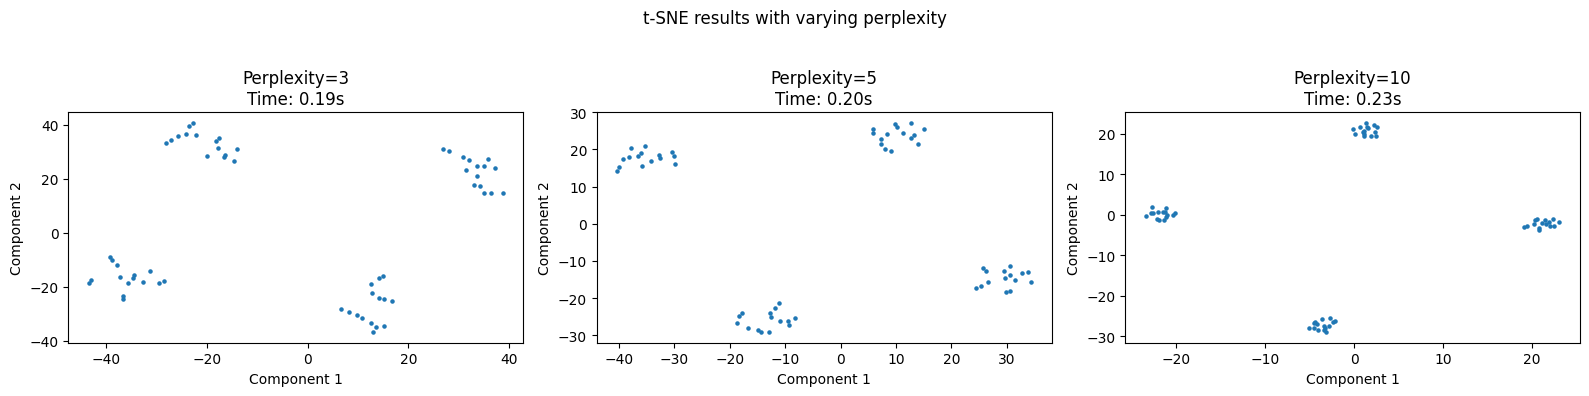

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X = data.values

# Задаем значения перплексии для экспериментов, ограничивая их значением < n_samples
perplexities = [p for p in [3, 5, 10] if p < X.shape[0]]

def visualize_tsne(X, perplexities, method='t-SNE'):
    fig, axes = plt.subplots(1, len(perplexities), figsize=(16, 4))
    fig.suptitle(f'{method} results with varying perplexity')

    for idx, perplexity in enumerate(perplexities):
        start_time = time.time()
        tsne = TSNE(n_components=2, perplexity=perplexity, method='barnes_hut' if method == 't-SNE' else 'exact')
        X_reduced = tsne.fit_transform(X)
        end_time = time.time()

        axes[idx].scatter(X_reduced[:, 0], X_reduced[:, 1], s=5)
        axes[idx].set_title(f'Perplexity={perplexity}\nTime: {end_time - start_time:.2f}s')
        axes[idx].set_xlabel('Component 1')
        axes[idx].set_ylabel('Component 2')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Визуализация результатов t-SNE
visualize_tsne(X, perplexities, method='t-SNE')


Перплексия = 5:

При низком значении перплексии t-SNE создает четко выраженные кластеры.
Каждый кластер более детализирован, и сохраняется локальная структура данных.
Однако глобальная структура может быть нарушена, и расстояния между кластерами не всегда отражают реальные различия между объектами.

Низкие значения перплексии лучше подходят для задач, где важна локальная структура и разделение кластеров на мелкие группы.

Перплексия = 30:

С увеличением перплексии кластеризация остается четкой, но структура данных становится более "сглаженной".
t-SNE все еще хорошо отображает локальные зависимости, но кластеры начинают приближаться друг к другу, сохраняя некоторую глобальную структуру.

Перплексия = 50:

При высокой перплексии кластеры еще ближе друг к другу.
t-SNE пытается сохранить более глобальную структуру данных, что приводит к уменьшению расстояний между кластерами.
Визуализация становится менее детализированной для отдельных кластеров, но сохраняется более крупномасштабная структура данных.

Высокие значения перплексии помогают сохранить глобальную структуру данных и расстояния между кластерами, что может быть полезно для изучения крупных структур.

Время работы t-SNE постепенно увеличивается с ростом перплексии. Это связано с тем, что при большей перплексии увеличивается количество соседей, учитываемых для каждой точки, что увеличивает вычислительную нагрузку.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе scipy.optimize.minimize.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.2960960997952e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.510e-14 -4.885e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: perplexity, early_exaggeration, exaggeration, initialization, dof. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [ ]:
!pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.8 MB/s eta 0:00:00


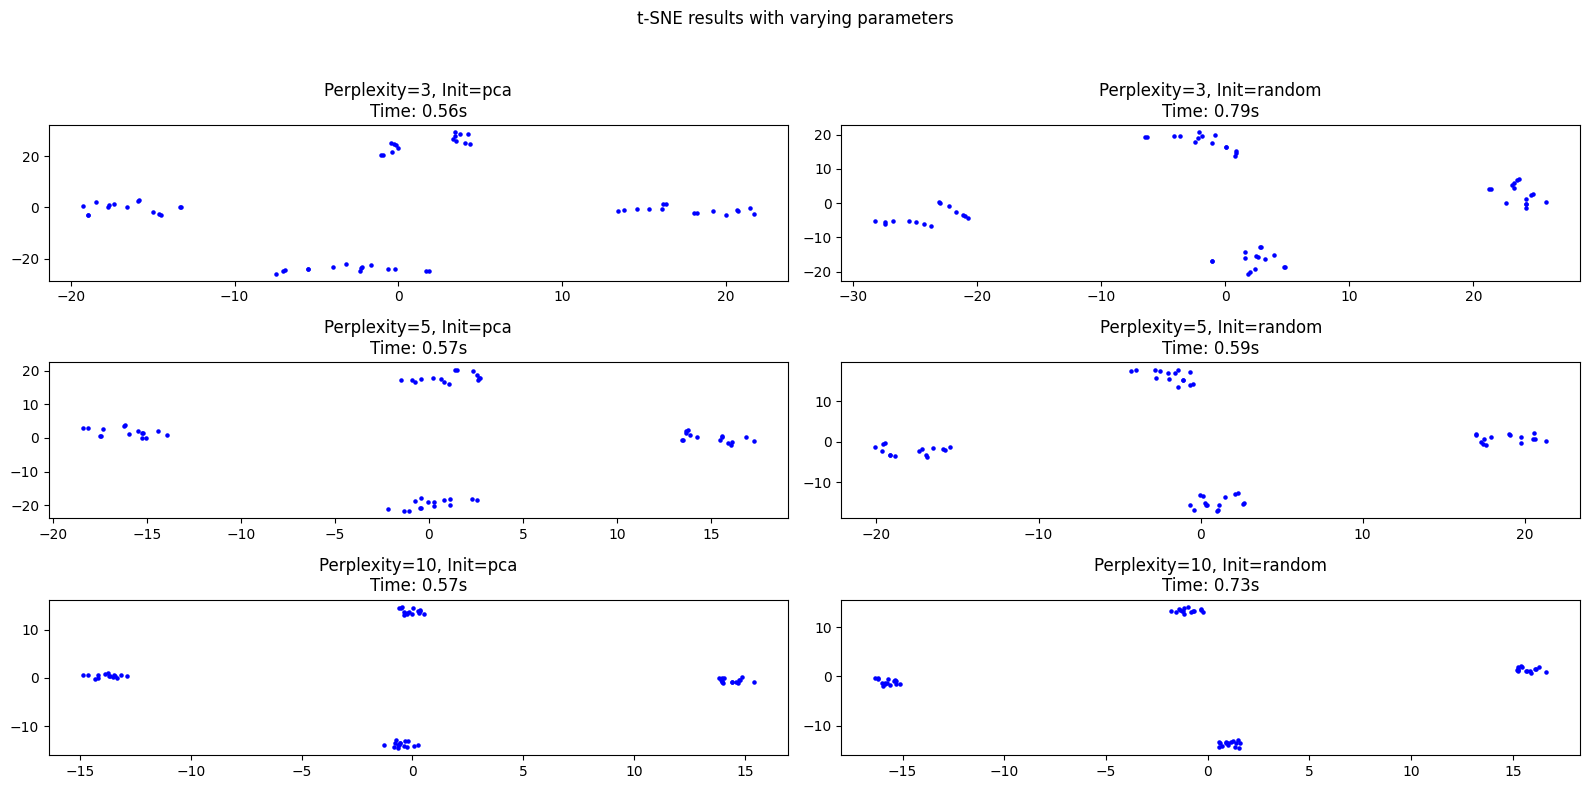

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from openTSNE.sklearn import TSNE

parameters = {
    "perplexities": [3, 5, 10],
    "early_exaggeration": [1.5, 4, 12],
    "exaggeration": [None, 1.2, 4],
    "initializations": ["pca", "random"],
    "dof": [0.5, 1, 2]
}

# Функция для визуализации и измерения времени работы t-SNE с различными параметрами
def run_tsne_experiments(X, parameters):
    fig, axes = plt.subplots(len(parameters["perplexities"]), len(parameters["initializations"]), figsize=(16, 8))
    fig.suptitle("t-SNE results with varying parameters")

    results = []

    for i, perplexity in enumerate(parameters["perplexities"]):
        for j, init in enumerate(parameters["initializations"]):
            start_time = time.time()
            tsne = TSNE(
                n_components=2,
                perplexity=perplexity,
                early_exaggeration=parameters["early_exaggeration"][1],
                exaggeration=parameters["exaggeration"][1],
                initialization=init,
                dof=parameters["dof"][1],
                n_iter=500,
                random_state=42,
                verbose=False
            )

            X_reduced = tsne.fit_transform(X)
            end_time = time.time()
            elapsed_time = end_time - start_time

            ax = axes[i, j]
            ax.scatter(X_reduced[:, 0], X_reduced[:, 1], s=5, c='blue')
            ax.set_title(f"Perplexity={perplexity}, Init={init}\nTime: {elapsed_time:.2f}s")

            results.append({
                "perplexity": perplexity,
                "initialization": init,
                "time": elapsed_time,
                "X_reduced": X_reduced
            })

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return results

results = run_tsne_experiments(X, parameters)

При увеличении перплексии (от 3 до 10) структура кластеров сохраняется, однако с более высокой перплексией наблюдается небольшое изменение положения кластеров.

Инициализация pca обеспечивает более стабильные результаты, с похожей кластерной структурой на каждом из значений перплексии. pca использует информативное начальное положение точек, что помогает t-SNE быстрее сходиться.

Инициализация random также привела к разделению на кластеры, но начальное распределение точек было более случайным, и требуется больше времени для стабилизации.

Время выполнения при random инициализации немного больше, чем при pca, что также подтверждает преимущество использования pca для достижения стабильных результатов быстрее.

Независимо от параметров перплексии и инициализации, структура данных остаётся стабильной, что указывает на хорошую кластерную структуру в исходных данных.

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

Загрузка данных MNIST...
Нормализация данных...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarnin

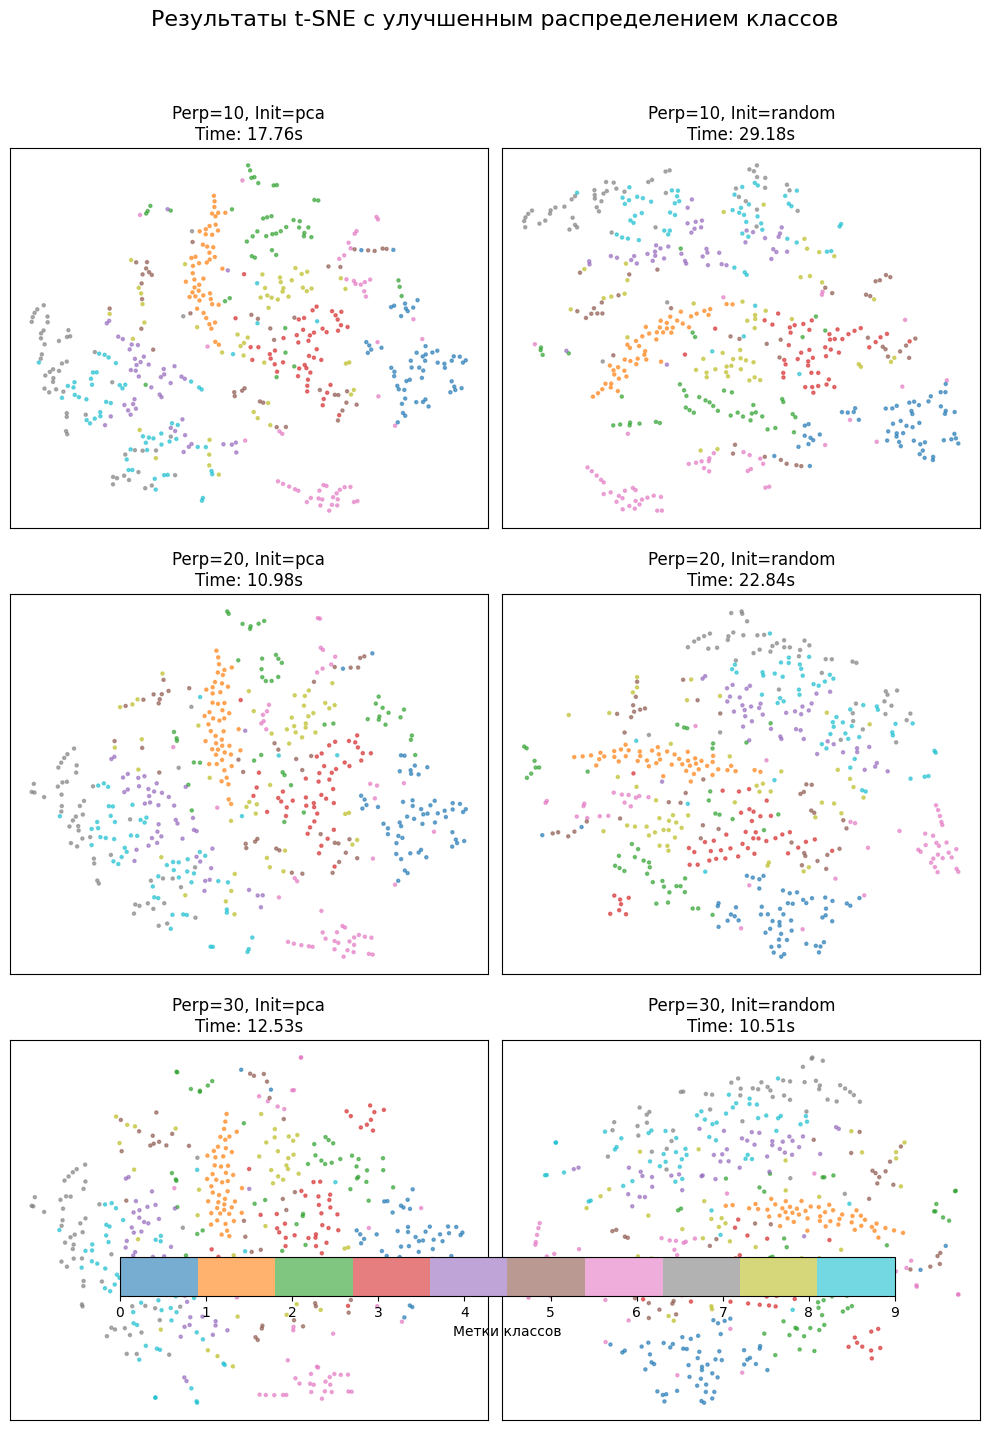

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

print("Загрузка данных MNIST...")
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print("Нормализация данных...")
X_normalized = StandardScaler().fit_transform(X)

parameters = {
    "perplexities": [10, 20, 30],
    "early_exaggeration": [1.5, 4, 12],
    "exaggeration": [None, 1.2, 4],
    "initializations": ["pca", "random"]
}

def run_tsne_experiments(X, y, parameters, sample_size=500):
    indices = np.random.choice(len(X), sample_size, replace=False)
    X_sample = X[indices]
    y_sample = y[indices]

    n_perplexity = len(parameters["perplexities"])
    n_init = len(parameters["initializations"])
    fig, axes = plt.subplots(n_perplexity, n_init, figsize=(5 * n_init, 5 * n_perplexity))
    fig.suptitle("Результаты t-SNE с улучшенным распределением классов", fontsize=16)

    results = []

    for i, perplexity in enumerate(parameters["perplexities"]):
        for j, init in enumerate(parameters["initializations"]):
            start_time = time.time()
            tsne = TSNE(
                n_components=2,
                perplexity=perplexity,
                early_exaggeration=parameters["early_exaggeration"][1],
                init=init,
                n_iter=10000,
                learning_rate=200,
                random_state=42,
                verbose=0
            )

            X_reduced = tsne.fit_transform(X_sample)
            end_time = time.time()
            elapsed_time = end_time - start_time

            ax = axes[i, j]
            scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample, cmap='tab10', s=5, alpha=0.6)
            ax.set_title(f"Perp={perplexity}, Init={init}\nTime: {elapsed_time:.2f}s")
            ax.set_xticks([])
            ax.set_yticks([])

            results.append({
                "perplexity": perplexity,
                "initialization": init,
                "time": elapsed_time,
                "X_reduced": X_reduced
            })

    cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.07)
    cbar.set_label("Метки классов")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return results

results = run_tsne_experiments(X_normalized, y, parameters, sample_size=500)


При увеличении перплексии наблюдается более равномерное распределение кластеров и лучшая их разделенность.

PCA-инициализация помогает создать стабильное начальное распределение точек, что позволяет t-SNE быстрее сходиться к хорошему решению. Время выполнения при этом немного увеличивается, но результат более воспроизводим.

Случайная инициализация приводит к более хаотичному началу, из-за чего результаты могут различаться при повторных запусках. Однако при большом количестве итераций разница сглаживается.